In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
reddit = pd.read_csv('reddit_data_example.csv')
reddit.head()

In [3]:
reddit.shape

(8137, 12)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.scatter(reddit['Date'], reddit['Reddit Score'])
plt.show()

In [ ]:
reddit['datetime'] = pd.to_datetime(reddit['Date'])
reddit['datetime'].describe()

In [ ]:
fig2, ax2 = plt.subplots()
ax2.scatter(reddit['datetime'], reddit['Reddit Score'])
plt.show()

In [ ]:
reddit['datetime'][0]

In [ ]:
reddit['datetime'].dt.date[0]

In [11]:
reddit_count_by_day = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()

In [ ]:
reddit_count_by_day

In [ ]:
fig3, ax3 = plt.subplots()
ax3.plot(reddit_count_by_day.index, reddit_count_by_day)
plt.show()

In [18]:
reddit_count_by_day.index.min(), reddit_count_by_day.index.max()

(datetime.date(2017, 6, 20), datetime.date(2023, 2, 9))

In [21]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='D')

In [ ]:
rds = pd.Series(reddit_count_by_day, index = date_range)
rds

In [ ]:
rds.mean()

In [24]:
rds_mean_fill = rds.fillna(6.8899)

In [ ]:
fig4, ax4 = plt.subplots()
ax4.plot(rds_mean_fill.index, rds_mean_fill)
plt.show()

In [ ]:
rds_zero_fill = rds.fillna(0)
fig5, ax5 = plt.subplots()
ax5.plot(rds_zero_fill.index, rds_zero_fill)
plt.show()

In [ ]:
fig6, ax6 = plt.subplots()
ax6.plot(rds.index, rds)
plt.show()

In [29]:
reddit_sample = reddit.sample(1000)

In [32]:
samp_counts = reddit_sample.groupby(reddit_sample['datetime'].dt.date)['Reddit Score'].count()
rds_samp = pd.Series(samp_counts, index = date_range)

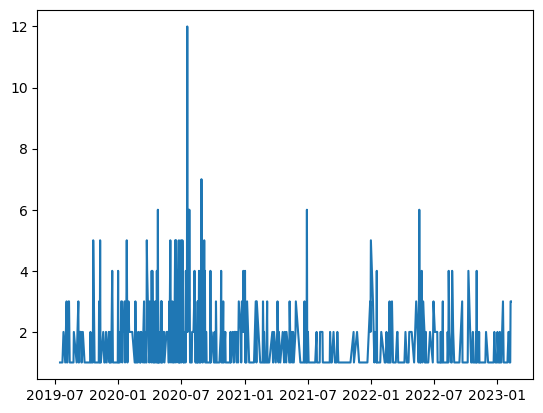

In [34]:
fig7, ax7 = plt.subplots()
ax7.plot(rds_samp.index, rds_samp.interpolate(method = 'time'))
plt.show()